# TREE DECISION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [29]:
import sys

import sys  
sys.path.insert(0, '../../scripts/')

import eda_tools

## Data

In [47]:
# Model 1 -> Lasso selected variables
full_train = pd.read_csv("../../data/csev/model_2/trainCSEV.csv")
full_test = pd.read_csv("../../data/csev/model_2/testCSEV.csv")

In [48]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

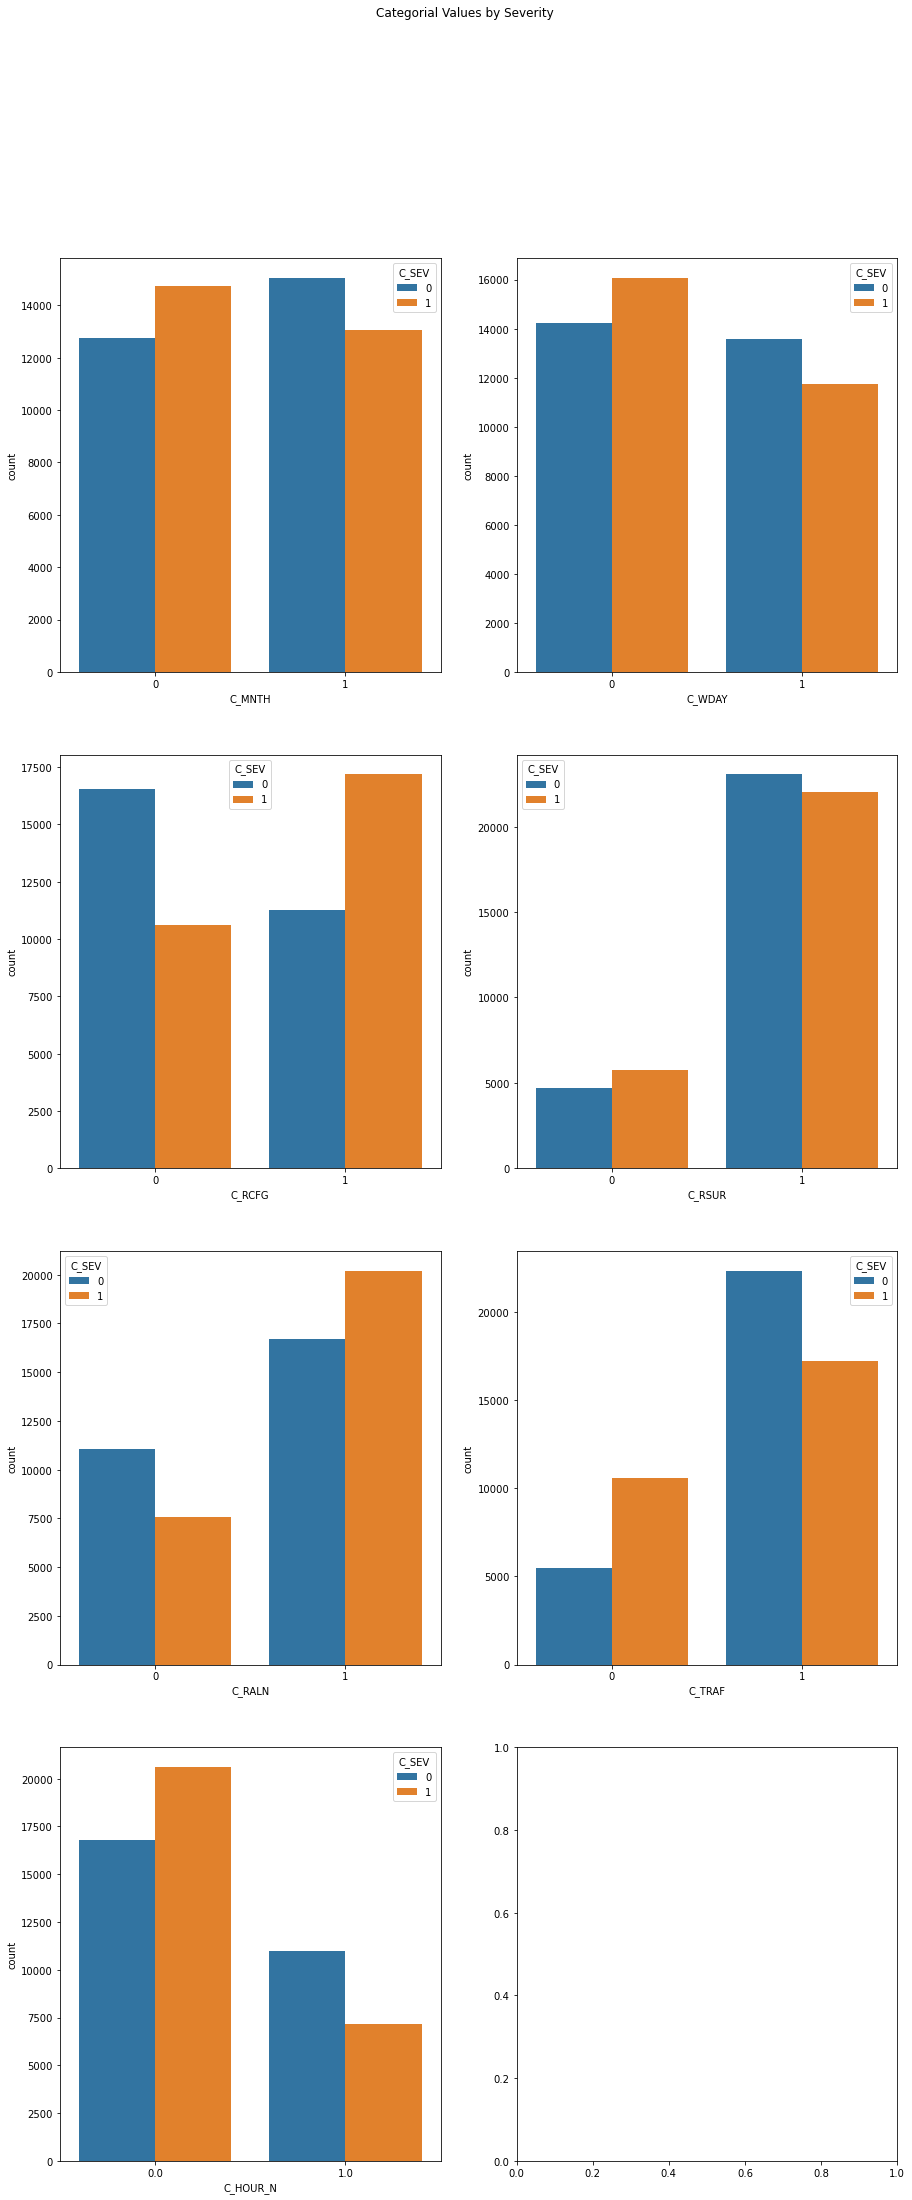

In [51]:
categorical = ['C_MNTH', 'C_WDAY', 'C_RCFG', 'C_RSUR', 'C_RALN',
       'C_TRAF', 'C_HOUR_N']

XY_train = X_train.copy()
XY_train['C_SEV'] = Y_train

fig, axes = plt.subplots(4, 2, figsize=(15, 35), sharey=False)
fig.suptitle('Categorial Values by Severity')

i = 0
j = 0
for cat in categorical:
    sns.countplot(data = XY_train, x = cat, hue = 'C_SEV', ax = axes[i,j]);
    if (j == 0): 
        j = 1
    else:
        j = 0
        i += 1

In [61]:
X_train = X_train.drop(['C_CONF'], axis=1)

In [53]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

In [62]:
X_test = X_test.drop(['C_CONF'], axis=1)

## Tree

In [63]:
treeModel = DecisionTreeClassifier(random_state=0)

In [64]:
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
Y_pred = treeModel.predict(X_test)

## Evaluation

In [66]:
metrics.accuracy_score(Y_test, Y_pred)

0.6209702642925762

Matriz de confusi贸n
[[  4684   2265]
 [133461 217678]]
Matriz de confusi贸n normalizada
[[0.67405382 0.32594618]
 [0.38008025 0.61991975]]


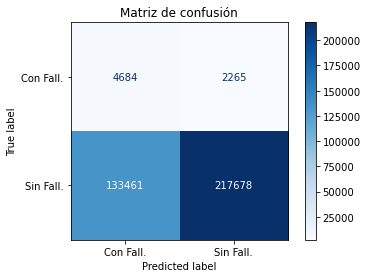

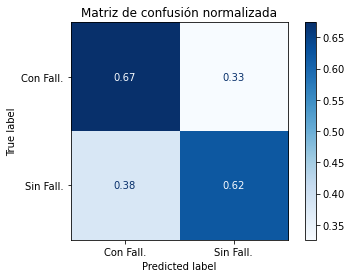

In [67]:
titles_options = [
    ("Matriz de confusi贸n", None),
    ("Matriz de confusi贸n normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        treeModel,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [60]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.03      0.34      0.06      6949
           1       0.98      0.81      0.89    351139

    accuracy                           0.80    358088
   macro avg       0.51      0.58      0.48    358088
weighted avg       0.97      0.80      0.87    358088

